Your Goal: Your goal is to predict how many calories were burned during a workout.

The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

The RMSLE is calculated as:
RMSLE=1n∑i=1n(log(1+yˆi)−log(1+yi))2−−−−−−−−−−−−−−−−−−−−−−−−−−√
where:

n
 is the total number of observations in the test set,
yˆi
 is the predicted value of the target for instance (i),
yi
 is the actual value of the target for instance (i), and,
log
 is the natural logarithm.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data= pd.read_csv('C:/devdev/Kaggle_contests/playground-series-s5e5 (1)/train.csv')
test_data= pd.read_csv('C:/devdev/Kaggle_contests/playground-series-s5e5 (1)/test.csv')

In [3]:
train_data.shape

(750000, 9)

In [4]:
def looking_at_the_data(df):
    return df.shape, df.info(), df.describe(), df.isna().sum()

In [5]:
looking_at_the_data(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


((750000, 9),
 None,
                   id            Age         Height         Weight  \
 count  750000.000000  750000.000000  750000.000000  750000.000000   
 mean   374999.500000      41.420404     174.697685      75.145668   
 std    216506.495284      15.175049      12.824496      13.982704   
 min         0.000000      20.000000     126.000000      36.000000   
 25%    187499.750000      28.000000     164.000000      63.000000   
 50%    374999.500000      40.000000     174.000000      74.000000   
 75%    562499.250000      52.000000     185.000000      87.000000   
 max    749999.000000      79.000000     222.000000     132.000000   
 
             Duration     Heart_Rate      Body_Temp       Calories  
 count  750000.000000  750000.000000  750000.000000  750000.000000  
 mean       15.421015      95.483995      40.036253      88.282781  
 std         8.354095       9.449845       0.779875      62.395349  
 min         1.000000      67.000000      37.100000       1.000000  
 2

In [6]:
train_data.head(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


KeyboardInterrupt: 

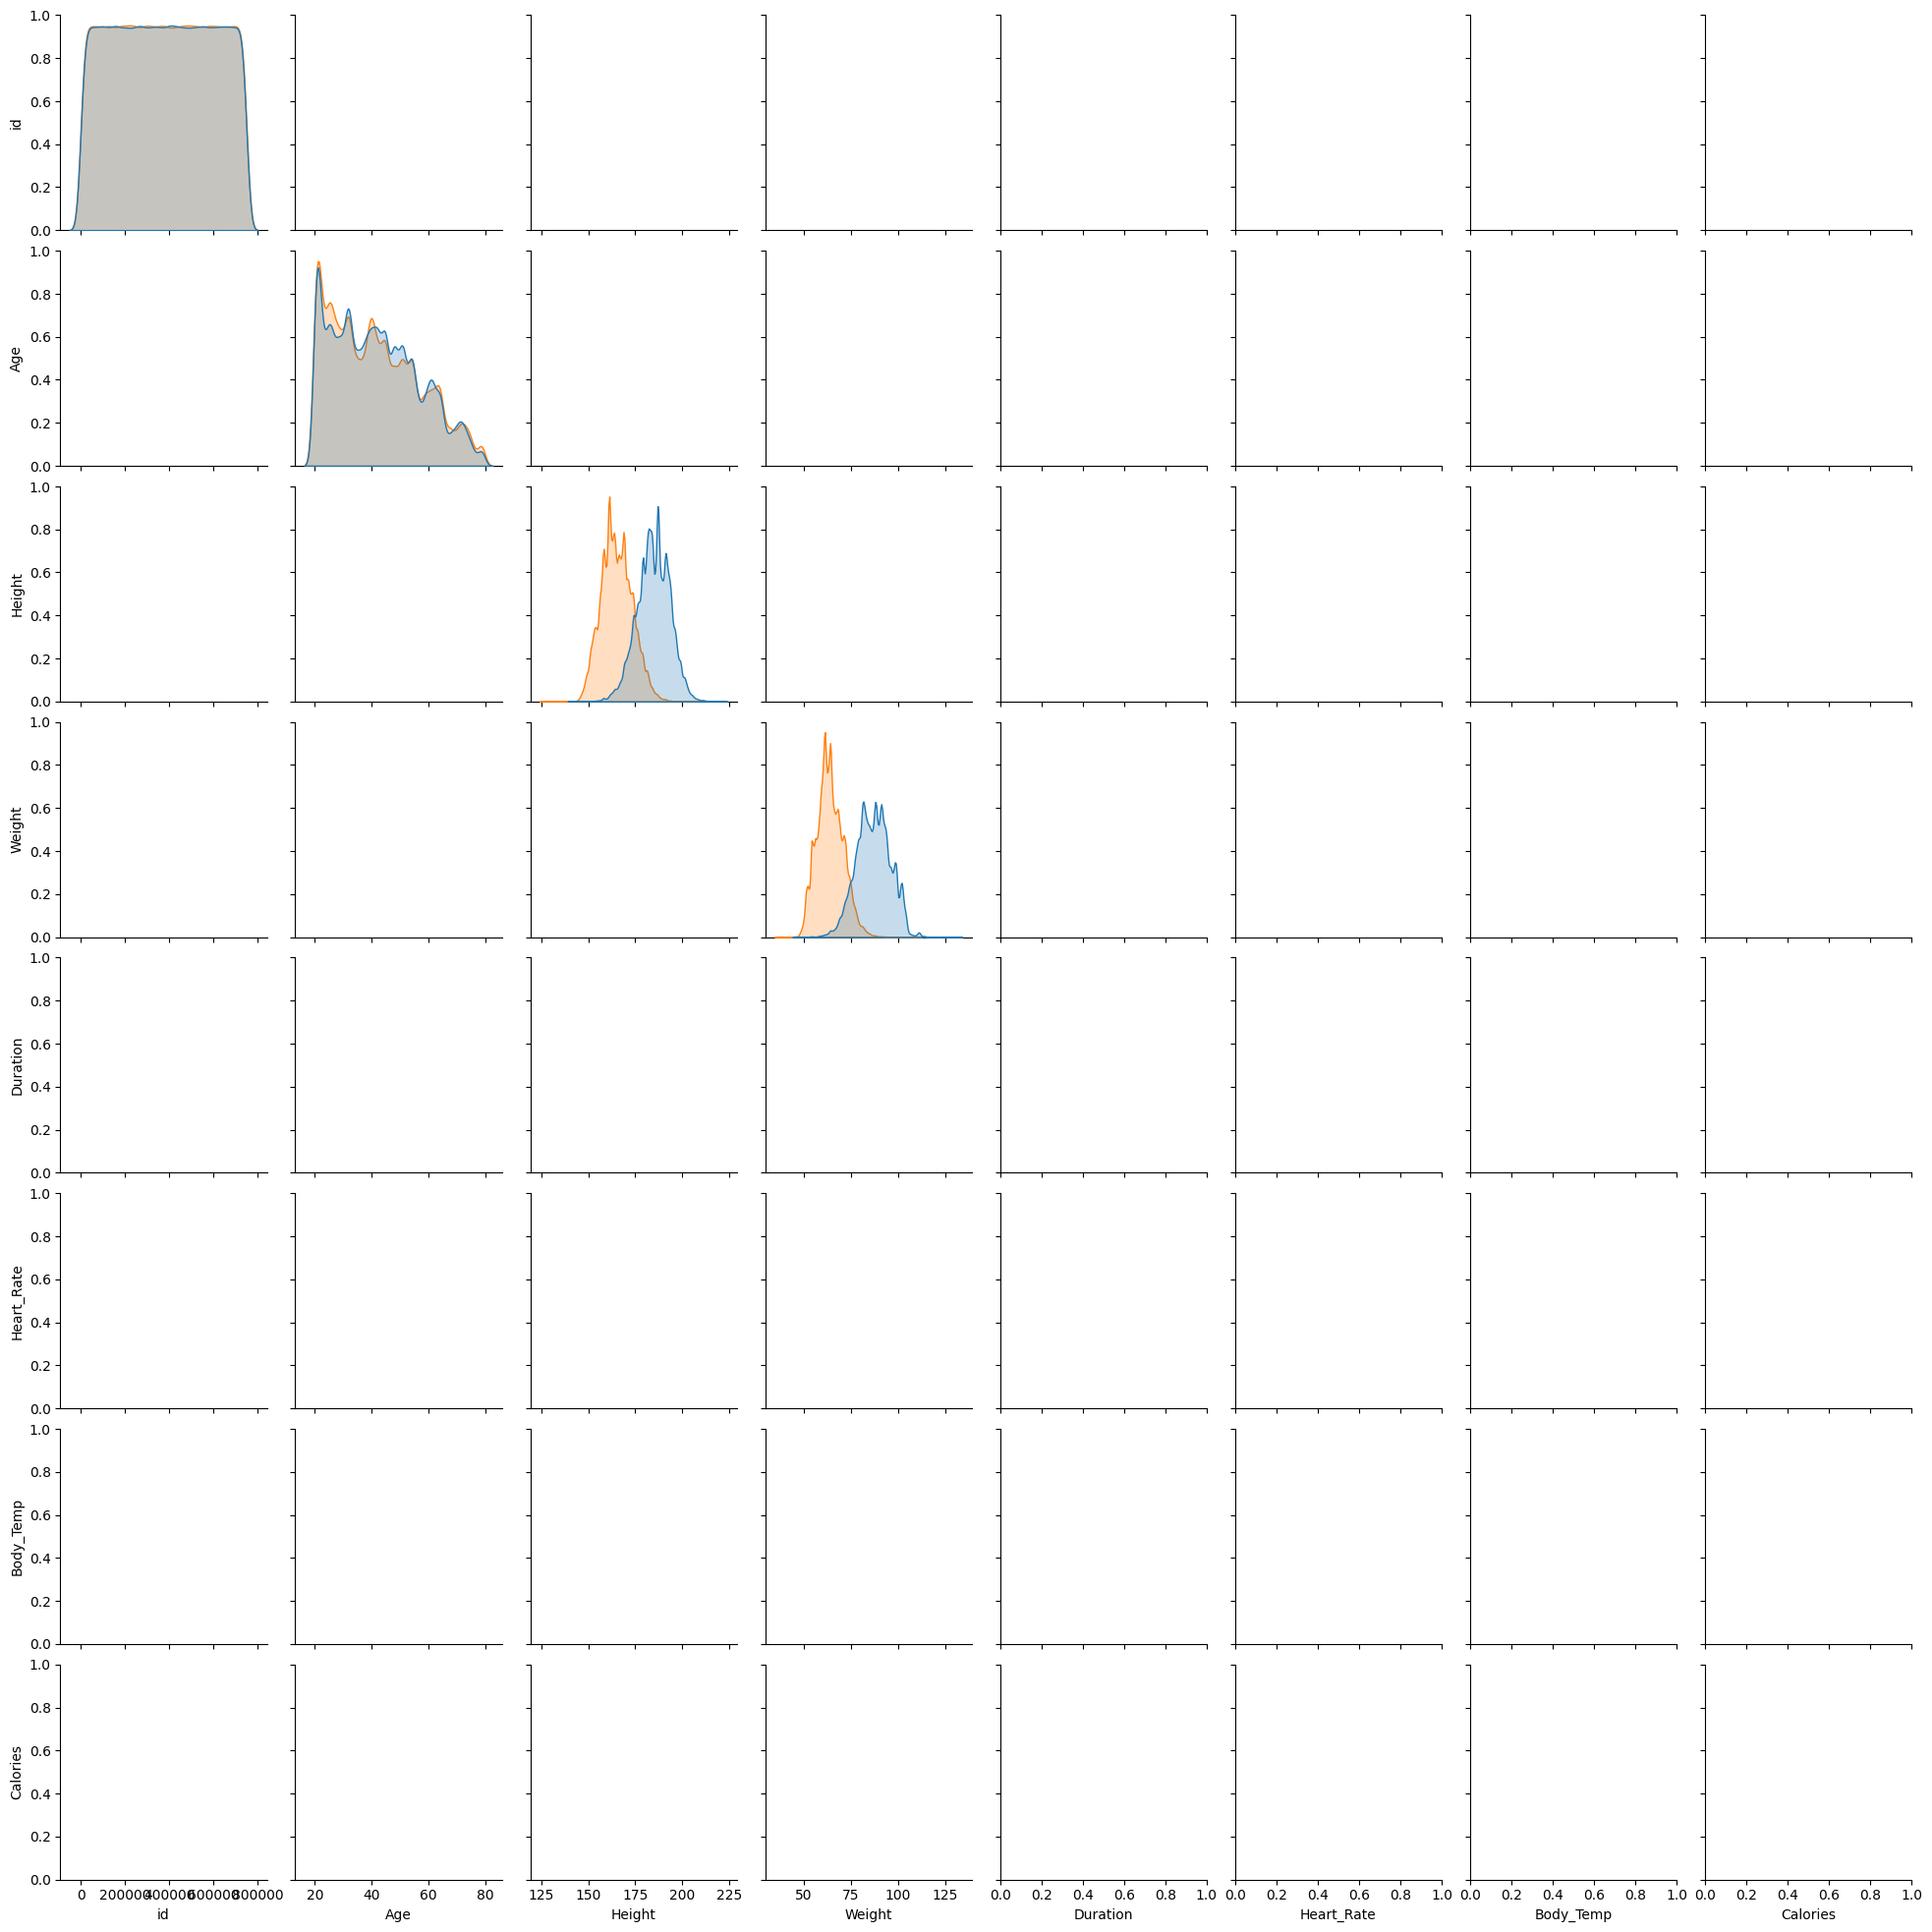

In [10]:
sns.pairplot(train_data, hue='Sex')
plt.show()


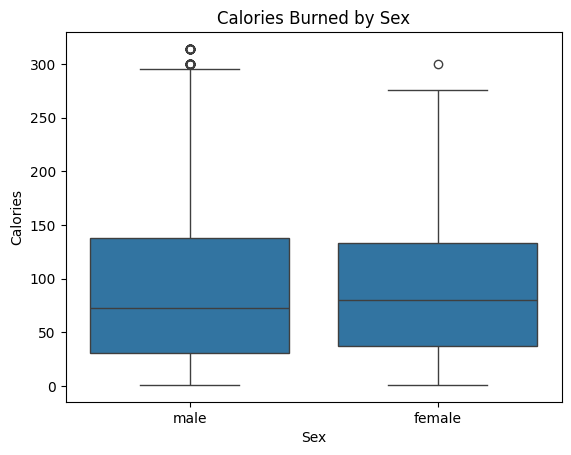

In [12]:
# 3. Boxplot: Calories vs Sex
sns.boxplot(x='Sex', y='Calories', data=train_data)
plt.title("Calories Burned by Sex")
plt.show()

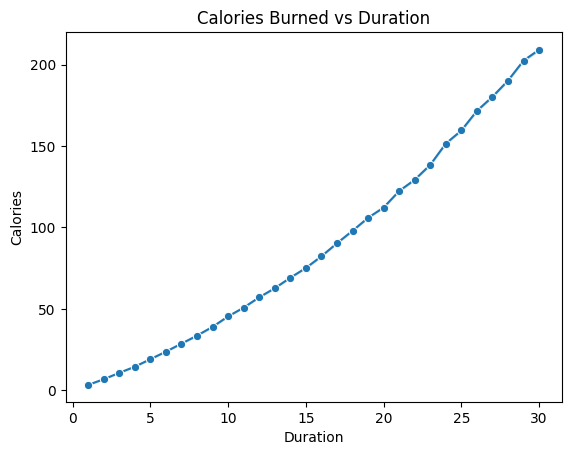

In [13]:
# 4. Lineplot: Duration vs Calories
sns.lineplot(x='Duration', y='Calories', data=train_data, marker='o')
plt.title("Calories Burned vs Duration")
plt.show()

In [ ]:
# 5. Scatterplot: Heart Rate vs Calories by Sex
sns.scatterplot(x='Heart_Rate', y='Calories', hue='Sex', data=train_data)
plt.title("Heart Rate vs Calories Burned")
plt.show()

In [ ]:
# 6. Histogram: Body Temperature
sns.histplot(train_data['Body_Temp'], kde=True)
plt.title("Distribution of Body Temperature")
plt.show()

In [14]:
#categorical col -> numerical
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()
train_data['Sex']=le.fit_transform(train_data['Sex'])
test_data['Sex']= le.fit_transform(test_data['Sex'])

In [16]:
#some feature engineering
for df in [train_data, test_data]:
    df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2
    df['HR_per_min'] = df['Heart_Rate'] / df['Duration']
    df['Temp_per_min'] = df['Body_Temp'] / df['Duration']
    df['Effort'] = df['Heart_Rate'] * df['Body_Temp'] * df['Duration']
    df['Age_Weight'] = df['Age'] * df['Weight']
    df['Weight_per_height'] = df['Weight'] / df['Height']
    df['log_Duration'] = np.log1p(df['Duration'])
    df['log_HR'] = np.log1p(df['Heart_Rate'])

In [17]:
train_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,HR_per_min,Temp_per_min,Effort,Age_Weight,Weight_per_height,log_Duration,log_HR
0,0,1,36,189.0,82.0,26.0,101.0,41.0,150.0,22.955684,3.884615,1.576923,107666.0,2952.0,0.433862,3.295837,4.624973
1,1,0,64,163.0,60.0,8.0,85.0,39.7,34.0,22.582709,10.625000,4.962500,26996.0,3840.0,0.368098,2.197225,4.454347
2,2,0,51,161.0,64.0,7.0,84.0,39.8,29.0,24.690405,12.000000,5.685714,23402.4,3264.0,0.397516,2.079442,4.442651
3,3,1,20,192.0,90.0,25.0,105.0,40.7,140.0,24.414062,4.200000,1.628000,106837.5,1800.0,0.468750,3.258097,4.663439
4,4,0,38,166.0,61.0,25.0,102.0,40.6,146.0,22.136740,4.080000,1.624000,103530.0,2318.0,0.367470,3.258097,4.634729


In [18]:
features = [
    'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
    'BMI', 'HR_per_min', 'Temp_per_min', 'Effort',
    'Age_Weight', 'Weight_per_height', 'log_Duration', 'log_HR'
]

X = train_data[features]
y = np.log1p(train_data["Calories"])  
X_test = test_data[features]

In [19]:
#preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
numerics= [col for col in X.columns if col != 'Sex']
preprocess= ColumnTransformer([('num', StandardScaler(), numerics)], remainder='passthrough')

In [20]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
caty= CatBoostRegressor(
    learning_rate=0.1,
    depth=8,
    l2_leaf_reg=5.2,
    random_strength=1.3,
    bagging_temperature=0.9,
    border_count=253,
    iterations=1000,
    early_stopping_rounds=50,
    verbose=0
)

xgb = XGBRegressor(
    learning_rate=0.1,
    max_depth=10,
    min_child_weight=2,
    gamma=0.01,
    subsample=0.9,
    colsample_bytree=0.6,
    reg_alpha=0.9,
    reg_lambda=1.3,
    n_estimators=1000,
    random_state=42
)

In [22]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
kf= KFold(n_splits=5, shuffle=True, random_state=42)

ocat= np.zeros(len(X))
oxgb= np.zeros(len(X))
test_cats= np.zeros(len(X_test))
test_xgb= np.zeros(len(X_test))

for train_idx, valid_idx in kf.split(X):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    pipe_cat= Pipeline([
        ('pree', preprocess),
        ('caty', caty)
    ])

    pipe_xgb= Pipeline([
        ('pree', preprocess),
        ('xgb', xgb)
    ])

    pipe_cat.fit(X_train, y_train)
    pipe_xgb.fit(X_train, y_train)

    ocat[valid_idx] = pipe_cat.predict(X_valid)
    oxgb[valid_idx] = pipe_xgb.predict(X_valid)

    test_cats += pipe_cat.predict(X_test) / kf.n_splits
    test_xgb += pipe_xgb.predict(X_test) / kf.n_splits

In [23]:
learned_weights = [0.64229672, 0.35776623]
test_meta_X = np.vstack([test_cats, test_xgb]).T

# Apply weights directly
final_pred_log = test_meta_X @ learned_weights
final_pred = np.expm1(final_pred_log)


In [24]:
submission = pd.DataFrame({
    "id": test_data["id"],
    "Calories": final_pred
})
submission.to_csv("submission.csv", index=False)
print("📁")

📁
